# CIDAUT AI Fake Scene Classification 2024

---
author: Brice Piaple Dada
date: December 21, 2024
---

## Unzip the data

In [23]:
import zipfile

# Path to the .zip file
zip_file_path = 'Data/cidaut-ai-fake-scene-classification-2024.zip'

# Path toi extract teh contents
extract_path = 'Data/Unzip_data'

# Open the .zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip:
    zip.extractall(extract_path)
    
    print("Extractiob Complete.")


Extractiob Complete.


## Import our libraries

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import LabelEncoder

2024-12-28 18:43:34.421717: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-28 18:43:34.434989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735429414.454038  140696 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735429414.459798  140696 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-28 18:43:34.480807: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Load our data

###  Load our csv and images files

In [3]:
csv_path = 'Data/Unzip_data/train.csv'

   image    label
0  1.jpg  editada
1  2.jpg     real
2  3.jpg     real
3  6.jpg  editada
4  8.jpg     real
Nombre de lignes: 720, Nombre de colonnes: 2
image    object
label    object
dtype: object
image    0
label    0
dtype: int64
label
real       405
editada    315
Name: count, dtype: int64
label
real       0.5625
editada    0.4375
Name: proportion, dtype: float64


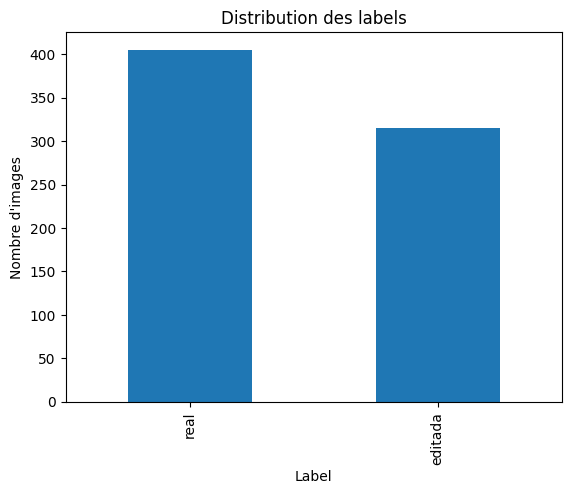

In [ ]:
# Charger le fichier CSV
df = pd.read_csv(csv_path)  # Remplacez "train.csv" par le nom de votre fichier

In [6]:
# Afficher les premières lignes
df.head()

,image,label
0,1.jpg,editada
1,2.jpg,real
2,3.jpg,real
3,6.jpg,editada
4,8.jpg,real


In [7]:
# Vérifier les dimensions du DataFrame
print(f"Nombre de lignes: {df.shape[0]}, Nombre de colonnes: {df.shape[1]}")

Nombre de lignes: 720, Nombre de colonnes: 2


In [12]:
# Vérifier les types de données
df.dtypes

image    object
label    object
dtype: object

In [13]:
# Analyser la distribution des labels
print(df["label"].value_counts())
print(df["label"].value_counts(normalize=True))

label
real       405
editada    315
Name: count, dtype: int64
label
real       0.5625
editada    0.4375
Name: proportion, dtype: float64


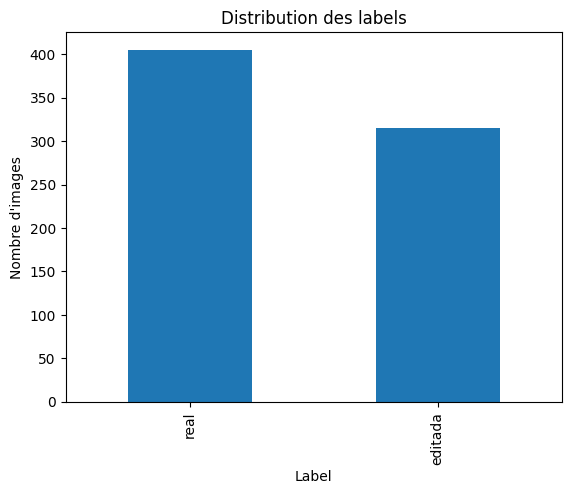

In [14]:
# On peut aussi visualiser la distribution des labels
import matplotlib.pyplot as plt
df["label"].value_counts().plot(kind='bar')
plt.title("Distribution des labels")
plt.xlabel("Label")
plt.ylabel("Nombre d'images")
plt.show()

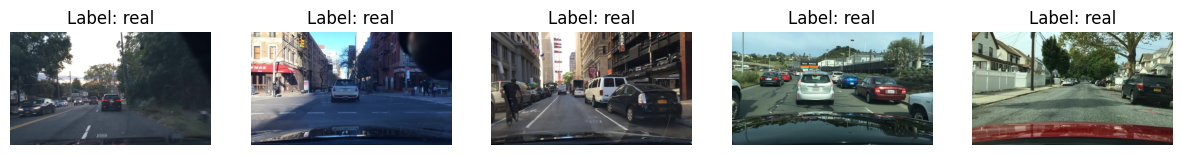

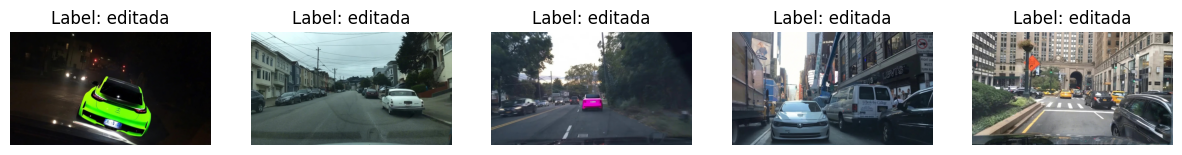

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Fonction pour afficher une image aléatoire d'une classe donnée
def visualize_images(df, label, num_images=5):
    filtered_df = df[df["label"] == label]
    if filtered_df.empty:
        print(f"No images found for label {label}")
        return
    image_files = filtered_df["image"].sample(min(num_images, len(filtered_df))).tolist()
    image_dir = "Data/Unzip_data/Train" #Chemin vers le dossier

    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(image_dir, image_file)
        img = mpimg.imread(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis("off")
    plt.show()

# Visualiser 5 images réelles (label 1)
visualize_images(df, 'real')

# Visualiser 5 images fausses (label 0)
visualize_images(df, 'editada')

Largeur moyenne: 1280.00
Hauteur moyenne: 720.00
Largeur min: 1280
Largeur max: 1280
Hauteur min: 720
Hauteur max: 720


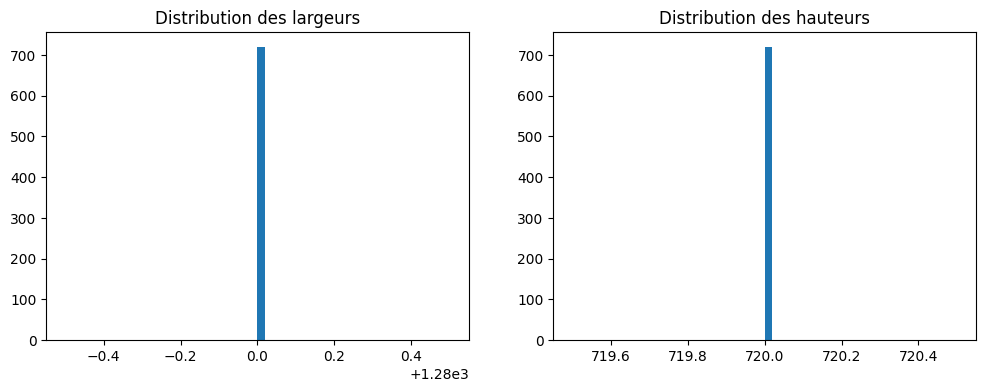

In [25]:
from PIL import Image

image_dir = "Data/Unzip_data/Train" # A remplacer par le chemin vers votre dossier d'images

def get_image_sizes(df: pd.Series, image_dir: str) -> tuple:
    widths = []
    heights = []
    for image_file in df["image"]:
        image_path = os.path.join(image_dir, image_file)
        try:
            with Image.open(image_path) as img:
                widths.append(img.width)
                heights.append(img.height)
        except FileNotFoundError:
            print(f"Image not found: {image_path}")
    return widths, heights

widths, heights = get_image_sizes(df, image_dir)

# Statistiques descriptives
print(f"Largeur moyenne: {sum(widths) / len(widths):.2f}")
print(f"Hauteur moyenne: {sum(heights) / len(heights):.2f}")
print(f"Largeur min: {min(widths)}")
print(f"Largeur max: {max(widths)}")
print(f"Hauteur min: {min(heights)}")
print(f"Hauteur max: {max(heights)}")

# Histogrammes
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=50)
plt.title("Distribution des largeurs")
plt.subplot(1, 2, 2)
plt.hist(heights, bins=50)
plt.title("Distribution des hauteurs")
plt.show()

## Préparation des données

In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Convertir les labels en entiers
df["label_int"] = label_encoder.fit_transform(df["label"])
df.head()

,image,label,image_path,label_int
0,1.jpg,editada,Data/Unzip_data/Train/1.jpg,0
1,2.jpg,real,Data/Unzip_data/Train/2.jpg,1
2,3.jpg,real,Data/Unzip_data/Train/3.jpg,1
3,6.jpg,editada,Data/Unzip_data/Train/6.jpg,0
4,8.jpg,real,Data/Unzip_data/Train/8.jpg,1


In [49]:
df["image_path"] = df["image"].apply(lambda x: os.path.join(image_dir, x))

In [50]:
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["label"])

In [51]:
print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")

Train size: 576
Validation size: 144


## Prétraitement des images

In [52]:
import tensorflow as tf

def preprocess_image(image_path, label, image_size=(224, 224)):
    """
    Charge, redimensionne et normalise une image.

    Args:
        image_path: Chemin vers l'image.
        label: Label de l'image.
        image_size: Taille cible de l'image (hauteur, largeur).

    Returns:
        Une image redimensionnée et normalisée, et son label.
    """
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, image_size)
    img = img / 255.0
    return img, label

Image shape: (224, 224, 3)
Label: editada


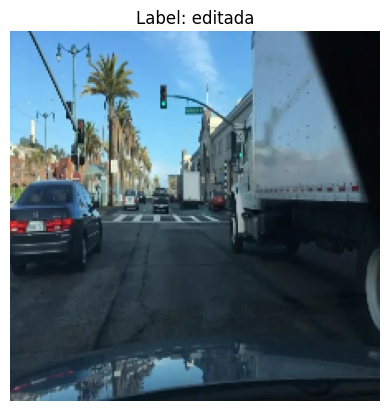

In [53]:
# Tester la fonction de prétraitement sur une image
image_path = train_df["image_path"].iloc[0]
label = train_df["label"].iloc[0]
image, label = preprocess_image(image_path, label)

print(f"Image shape: {image.shape}")
print(f"Label: {label}")

# Afficher l'image
plt.imshow(image)
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",
    y_col="label_int",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="raw",
    shuffle=True,
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="image_path",
    y_col="label_int",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="raw",
    shuffle=False,
)


Found 576 validated image filenames.
Found 144 validated image filenames.


## Define the model

In [55]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Charger ResNet50 pré-entraîné sur ImageNet (sans la couche de classification)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Geler les couches du modèle de base
base_model.trainable = False

# Créer le modèle final en ajoutant une couche de classification
model = Sequential(
    [
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation="sigmoid"),
    ]
)

# Compiler le modèle
model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

## Fit the model

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

# Définir un callback EarlyStopping
# early_stopping = EarlyStopping(
#     monitor="val_loss", patience=5, restore_best_weights=True
# )

# Entraîner le modèle
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

/media/etudiant/New D/PyTorch_TensorFlow/.pytorch_tensorflow/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.4721 - loss: 0.8889 - val_accuracy: 0.5208 - val_loss: 0.7930
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5690 - loss: 0.7152 - val_accuracy: 0.5694 - val_loss: 0.7860
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5926 - loss: 0.6507 - val_accuracy: 0.5903 - val_loss: 0.7353
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.6593 - loss: 0.5990 - val_accuracy: 0.5833 - val_loss: 0.6591
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.6765 - loss: 0.6094 - val_accuracy: 0.6250 - val_loss: 0.6484



## Phase de Finalisation et Soumission


In [65]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ajouter le chemin complet aux images
test_dir = "Data/Unzip_data/Test" 

def preprocess_image_test(image_path, image_size=(224, 224)):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, image_size)
    img = tf.keras.applications.resnet50.preprocess_input(img)
    return img

image_size = (224, 224)

# Liste des chemins des images de test
image_paths = [os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith(('.jpg', '.jpeg'))]
num_samples = len(image_paths)
print("Found {} images.".format(num_samples))

# Créer un dataset à partir des chemins des images
dataset = tf.data.Dataset.from_tensor_slices(image_paths)

# Appliquer la fonction de prétraitement à chaque image
dataset = dataset.map(lambda x: preprocess_image_test(x, image_size))

# Créer des batchs de taille 1
dataset = dataset.batch(1)


Found 180 images.


In [66]:
# Effectuer les prédictions
predictions = model.predict(dataset, steps=num_samples)
# Binariser les prédictions (si nécessaire)
binary_predictions = (predictions > 0.5).astype(int)

180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step


In [68]:
# Extraire les noms de fichiers avec les extensions
image_names = [os.path.basename(f) for f in image_paths]
# Créer un DataFrame avec les prédictions
submission_df = pd.DataFrame(
    {"image": image_names, "label": binary_predictions.flatten()}
)

# Enregistrer le DataFrame dans un fichier CSV
submission_df.to_csv("submission.csv", index=False)
